- Import
- Cleaning Function
- EDA, Data Cleaning
- Data Grouping
- Visualization of Variables
- Define Functions
- Statistical Tests

# Import
- libraries
- warnings
- colors

In [1]:
import os
import pandas as pd
import numpy as np
from pprint import pprint
import quandl
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as py
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import ARIMA 
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7


plt.style.use('fivethirtyeight')  #set color scheme for plt

pd.set_option('display.max_rows', None)   #see all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)


# key = os.environ.get("QUANDL_API")  #set api key from environment variables
# # key  # check if key loaded
# quandl.ApiConfig.api_key = key #set api for quandl configuration
# df = quandl.get_table("WB/DATA", paginate=True)

               #Downloaded csv from Quandl due to size

path = r'/Users/amritambe/Desktop/Analysis_Project/Women_Empowerment/'

df = pd.read_csv(os.path.join(path, '2 Data', 'World_Bank', 'WB_DATA.csv'))
meta = pd.read_csv(os.path.join(path, '2 Data', 'World_Bank', 'WB_METADATA.csv'))


wei = pd.read_csv(os.path.join(path, '2 Data', 'Clean_Data', '12_3_2023_WEI_GDP_LIFE.csv'), index_col='Unnamed: 0')

df.head()

series_id country_code  \
0        DC.DAC.DEUL.CD          FJI   
1  EN.ATM.NOXE.AG.KT.CE          SSA   
2  EN.ATM.NOXE.AG.KT.CE          SSA   
3  EN.ATM.NOXE.AG.KT.CE          SSA   
4  EN.ATM.NOXE.AG.KT.CE          SSA   

                                 country_name  year          value  
0                                        Fiji  2003  109999.999404  
1  Sub-Saharan Africa (excluding high income)  1970  280488.417477  
2  Sub-Saharan Africa (excluding high income)  1971  203873.439003  
3  Sub-Saharan Africa (excluding high income)  1972  210371.610345  
4  Sub-Saharan Africa (excluding high income)  1973  225710.677001

# Cleaning Function
- match_countries(), use to help change names for merging

In [2]:
#match Country_Name from energy df and wei df
def match_countries(df1, df2, x, y, list=False):
    '''
    matches unique strings and outputs stats
    - df1, dataframe 1
    - df2, dataframe 2
    - x, df1 column
    - y, df2 column
    - list, default False, lists unmatched strings

    Outputs results of list comprehension
    '''
    
    x_countries = df1[x].unique()
    y_countries = df2[y].unique()
    
    matched = [i for i in x_countries if i in y_countries]
    
    x_unmatched = [i for i in x_countries if i not in matched]
    y_unmatched = [i for i in y_countries if i not in matched]

    print(f'countries in df1: {len(x_countries)}\n\
countries in df2: {len(y_countries)}\n\
matched countries: {len(matched)}\n\n')

    if list:
        print('df1 unmatched:')
        pprint(x_unmatched)
        print('\n\ndf2 unmatched:')
        pprint(y_unmatched)

# EDA/ Data Cleaning
- merge world bank data and wei data
- Energy_Per_Cap column
  - Energy use refers to use of primary energy before transformation to other end-use fuels, which is equal to indigenous production plus imports and stock changes, minus exports and fuels supplied to ships and aircraft engaged in international transport.

In [3]:
#rename columns
df = df.rename(columns={'series_id':'Series_Id',     
                   'country_name':'Country_Name', 
                   'year':'Year', 'value':'Value'})
meta = meta.rename(columns={'series_id':'Series_Id', 
                   'name':'Series_Name'})


df.columns.tolist(), meta.columns.tolist()

(['Series_Id', 'country_code', 'Country_Name', 'Year', 'Value'],
 ['Series_Id', 'Series_Name', 'description'])

In [4]:
meta.query('Series_Id.str.contains("EG.USE.PCAP.KG.OE")')

Series_Id                                   Series_Name  \
86  EG.USE.PCAP.KG.OE  Energy use (kg of oil equivalent per capita)   

                                                                                                                                                                                                                                                    description  
86  Energy use refers to use of primary energy before transformation to other end-use fuels, which is equal to indigenous production plus imports and stock changes, minus exports and fuels supplied to ships and aircraft engaged in international transport.

In [5]:
#filter for Energy Use per capita, 1972-2020
energy = df.query('Series_Id.str.contains("EG.USE.PCAP.KG.OE") & 2020 >= Year >= 1972')
energy = energy.rename(columns={'Value':'Energy_Per_Cap'})
energy

Series_Id country_code  \
3297326  EG.USE.PCAP.KG.OE          AFE   
3297327  EG.USE.PCAP.KG.OE          AFW   
3297328  EG.USE.PCAP.KG.OE          AGO   
3297329  EG.USE.PCAP.KG.OE          ALB   
3297330  EG.USE.PCAP.KG.OE          ARB   
3297331  EG.USE.PCAP.KG.OE          ARE   
3297332  EG.USE.PCAP.KG.OE          ARG   
3297333  EG.USE.PCAP.KG.OE          AUS   
3297334  EG.USE.PCAP.KG.OE          AUT   
3297335  EG.USE.PCAP.KG.OE          BEL   
3297336  EG.USE.PCAP.KG.OE          BEN   
3297337  EG.USE.PCAP.KG.OE          BGD   
3297338  EG.USE.PCAP.KG.OE          BGR   
3297339  EG.USE.PCAP.KG.OE          BHR   
3297340  EG.USE.PCAP.KG.OE          BOL   
3297341  EG.USE.PCAP.KG.OE          BRA   
3297342  EG.USE.PCAP.KG.OE          BRN   
3297343  EG.USE.PCAP.KG.OE          CAN   
3297344  EG.USE.PCAP.KG.OE          CEB   
3297345  EG.USE.PCAP.KG.OE          CHE   
3297346  EG.USE.PCAP.KG.OE          CHL   
3297347  EG.USE.PCAP.KG.OE          CHN   
3297348  EG.USE.PCAP.KG.OE          CIV   
3297349  EG.USE.PCAP.KG.OE          CMR   
3297350  EG.USE.PCAP.KG.OE          COD   
3297351  EG.USE.PCAP.KG.OE          COG   
3297352  EG.USE.PCAP.KG.OE          COL   
3297353  EG.USE.PCAP.KG.OE          CRI   
3297354  EG.USE.PCAP.KG.OE          CUB   
3297355  EG.USE.PCAP.KG.OE          CUW   
3297356  EG.USE.PCAP.KG.OE          CYP   
3297357  EG.USE.PCAP.KG.OE          CZE   
3297358  EG.USE.PCAP.KG.OE          DEU   
3297359  EG.USE.PCAP.KG.OE          DNK   
3297360  EG.USE.PCAP.KG.OE          DOM   
3297361  EG.USE.PCAP.KG.OE          DZA   
3297362  EG.USE.PCAP.KG.OE          EAP   
3297363  EG.USE.PCAP.KG.OE          EAR   
3297364  EG.USE.PCAP.KG.OE          EAS   
3297365  EG.USE.PCAP.KG.OE          ECU   
3297366  EG.USE.PCAP.KG.OE          EGY   
3297367  EG.USE.PCAP.KG.OE          EMU   
3297368  EG.USE.PCAP.KG.OE          ESP   
3297369  EG.USE.PCAP.KG.OE          ETH   
3297370  EG.USE.PCAP.KG.OE          EUU   
3297371  EG.USE.PCAP.KG.OE          FCS   
3297372  EG.USE.PCAP.KG.OE          FIN   
3297373  EG.USE.PCAP.KG.OE          FRA   
3297374  EG.USE.PCAP.KG.OE          GAB   
3297375  EG.USE.PCAP.KG.OE          GBR   
3297376  EG.USE.PCAP.KG.OE          GHA   
3297377  EG.USE.PCAP.KG.OE          GIB   
3297378  EG.USE.PCAP.KG.OE          GRC   
3297379  EG.USE.PCAP.KG.OE          GTM   
3297380  EG.USE.PCAP.KG.OE          HIC   
3297381  EG.USE.PCAP.KG.OE          HKG   
3297382  EG.USE.PCAP.KG.OE          HND   
3297383  EG.USE.PCAP.KG.OE          HTI   
3297384  EG.USE.PCAP.KG.OE          HUN   
3297385  EG.USE.PCAP.KG.OE          IBD   
3297386  EG.USE.PCAP.KG.OE          IBT   
3297387  EG.USE.PCAP.KG.OE          IDA   
3297388  EG.USE.PCAP.KG.OE          IDB   
3297389  EG.USE.PCAP.KG.OE          IDN   
3297390  EG.USE.PCAP.KG.OE          IDX   
3297391  EG.USE.PCAP.KG.OE          IND   
3297392  EG.USE.PCAP.KG.OE          IRL   
3297393  EG.USE.PCAP.KG.OE          IRN   
3297394  EG.USE.PCAP.KG.OE          IRQ   
3297395  EG.USE.PCAP.KG.OE          ISL   
3297396  EG.USE.PCAP.KG.OE          ISR   
3297397  EG.USE.PCAP.KG.OE          ITA   
3297398  EG.USE.PCAP.KG.OE          JAM   
3297399  EG.USE.PCAP.KG.OE          JOR   
3297400  EG.USE.PCAP.KG.OE          JPN   
3297401  EG.USE.PCAP.KG.OE          KEN   
3297402  EG.USE.PCAP.KG.OE          KOR   
3297403  EG.USE.PCAP.KG.OE          KWT   
3297404  EG.USE.PCAP.KG.OE          LAC   
3297405  EG.USE.PCAP.KG.OE          LBN   
3297406  EG.USE.PCAP.KG.OE          LBY   
3297407  EG.USE.PCAP.KG.OE          LCN   
3297408  EG.USE.PCAP.KG.OE          LDC   
3297409  EG.USE.PCAP.KG.OE          LKA   
3297410  EG.USE.PCAP.KG.OE          LMC   
3297411  EG.USE.PCAP.KG.OE          LMY   
3297412  EG.USE.PCAP.KG.OE          LTE   
3297413  EG.USE.PCAP.KG.OE          LUX   
3297414  EG.USE.PCAP.KG.OE          MAR   
3297415  EG.USE.PCAP.KG.OE          MEA   
3297416  EG.USE.PCAP.KG.OE          MEX   
3297417  EG.USE.PCAP.KG.OE          MIC   
3297418  EG.USE.PC

In [6]:
match_countries(energy, wei, 'Country_Name', 'Country_Name', list=True)

countries in df1: 220
countries in df2: 190
matched countries: 142


df1 unmatched:
['Africa Eastern and Southern',
 'Africa Western and Central',
 'Arab World',
 'Brunei Darussalam',
 'Central Europe and the Baltics',
 "Cote d'Ivoire",
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Cuba',
 'Curacao',
 'Czechia',
 'East Asia & Pacific (excluding high income)',
 'Early-demographic dividend',
 'East Asia & Pacific',
 'Egypt, Arab Rep.',
 'Euro area',
 'European Union',
 'Fragile and conflict affected situations',
 'Gibraltar',
 'High income',
 'IBRD only',
 'IDA & IBRD total',
 'IDA total',
 'IDA blend',
 'IDA only',
 'Iran, Islamic Rep.',
 'Korea, Rep.',
 'Latin America & Caribbean (excluding high income)',
 'Latin America & Caribbean',
 'Least developed countries: UN classification',
 'Lower middle income',
 'Low & middle income',
 'Late-demographic dividend',
 'Middle East & North Africa',
 'Middle income',
 'Middle East & North Africa (excluding high income)',
 'North America',
 'OECD member

In [7]:
country_mapping = {
    'Brunei Darussalam': 'Brunei',
    'Central Europe and the Baltics': 'Czech Republic',
    "Cote d'Ivoire": 'Ivory Coast',
    'Congo, Dem. Rep.': 'Democratic Republic of the Congo',
    'Congo, Rep.': 'Republic of the Congo',
    'Czechia': 'Czech Republic',
    'Egypt, Arab Rep.': 'Egypt',
    'Iran, Islamic Rep.': 'Iran',
    'Korea, Rep.': 'South Korea',
    "Korea, Dem. People's Rep.": 'North Korea',
    'Slovak Republic': 'Slovakia',
    'Syrian Arab Republic': 'Syria',
    'Turkiye': 'Turkey',
    'United States': 'United States of America',
    'Venezuela, RB': 'Venezuela',
    'Viet Nam': 'Vietnam',
    'Yemen, Rep.': 'Yemen',
    'Bahamas, The': 'The Bahamas',
    'Gambia, The': 'Gambia',
    'Guinea-Bissau': 'Guinea Bissau',
    'Kyrgyz Republic': 'Kyrgyzstan',
    'North Macedonia': 'Macedonia',
    'Russian Federation': 'Russia',
    'Eswatini': 'Swaziland',
    'Timor-Leste': 'East Timor',
    'Tanzania': 'United Republic of Tanzania',
    'Serbia': 'Republic of Serbia',
}

In [8]:
#change country names
energy['Country_Name'] = energy['Country_Name'].replace(country_mapping)   #use replace to avoid nans

#check country names
match_countries(energy, wei, 'Country_Name', 'Country_Name', list=True)

countries in df1: 219
countries in df2: 190
matched countries: 167


df1 unmatched:
['Africa Eastern and Southern',
 'Africa Western and Central',
 'Arab World',
 'Cuba',
 'Curacao',
 'East Asia & Pacific (excluding high income)',
 'Early-demographic dividend',
 'East Asia & Pacific',
 'Euro area',
 'European Union',
 'Fragile and conflict affected situations',
 'Gibraltar',
 'High income',
 'IBRD only',
 'IDA & IBRD total',
 'IDA total',
 'IDA blend',
 'IDA only',
 'Latin America & Caribbean (excluding high income)',
 'Latin America & Caribbean',
 'Least developed countries: UN classification',
 'Lower middle income',
 'Low & middle income',
 'Late-demographic dividend',
 'Middle East & North Africa',
 'Middle income',
 'Middle East & North Africa (excluding high income)',
 'North America',
 'OECD members',
 'Pre-demographic dividend',
 'North Korea',
 'Post-demographic dividend',
 'South Asia',
 'Sub-Saharan Africa (excluding high income)',
 'Sub-Saharan Africa',
 'East Asia & Pacifi

In [9]:
#merge energy use data into wei
df_full = pd.merge(wei, energy[['Country_Name', 'Year', 'Energy_Per_Cap']], 
                   how='left', on=['Country_Name', 'Year'], 
                   indicator=True)
df_full.isna().sum()

Country_Id                  0
Country_Name                0
Year                        0
GDP_Growth                  0
Index_1971                  0
Index_2020                  0
Fifty_Year_Change           0
Region                      0
Income_Group                0
Question_Category           0
Question                    0
Index_Score                 0
2020_Data_Rank              0
2020_1GB_Price(USD)         0
Life_Exp                    0
Population                  0
GDP_Per_Cap                 0
Avg_WEI_Score               0
Energy_Per_Cap         134120
_merge                      0
dtype: int64

# _____________________________________________________ Data Grouping

# energy_series
- data series for stationarity, 1970-2014 *worldwide median yearly energy use per cap*

<Axes: title={'center': 'Energy Use, 1970-2014'}, xlabel='Year'>

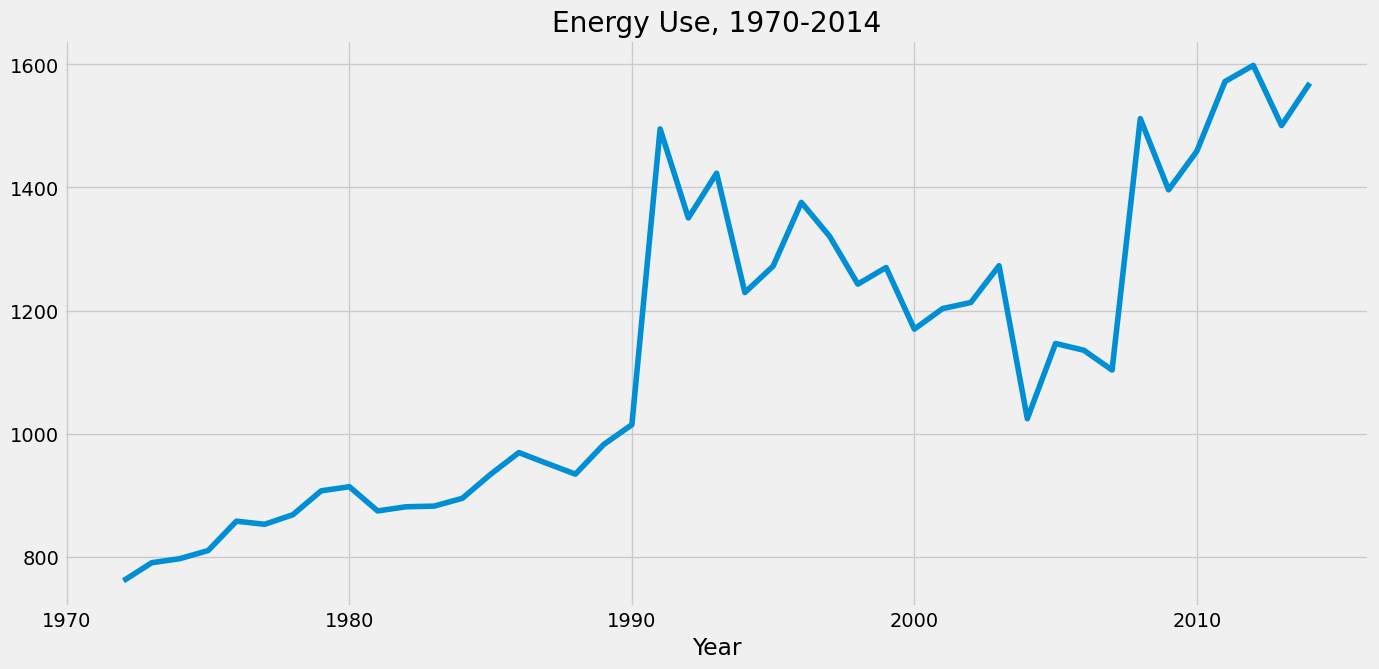

In [10]:
energy_series = df_full.query('2015>Year > 1970') \
                       .groupby('Year')['Energy_Per_Cap'] \
                       .median() 

energy_series.plot(kind='line', title='Energy Use, 1970-2014')

# Groupby
- country_, df grouped by country, year

In [11]:
df_full.drop(columns='_merge', axis=1, inplace=True)
df_full.columns.tolist()

['Country_Id',
 'Country_Name',
 'Year',
 'GDP_Growth',
 'Index_1971',
 'Index_2020',
 'Fifty_Year_Change',
 'Region',
 'Income_Group',
 'Question_Category',
 'Question',
 'Index_Score',
 '2020_Data_Rank',
 '2020_1GB_Price(USD)',
 'Life_Exp',
 'Population',
 'GDP_Per_Cap',
 'Avg_WEI_Score',
 'Energy_Per_Cap']

In [12]:
df1 = df_full[[
 'Country_Name',
 'Year',
 # 'Region',
 # 'Income_Group',
 # 'Question_Category',
 # 'Question',
 'Index_Score',
 'Life_Exp',
 'Population',
 'GDP_Per_Cap',
 # 'Avg_WEI_Score',
 'Energy_Per_Cap'
]].copy()

#groupby relevant variables
country_ = df1.groupby(['Country_Name', 'Year']) \
              .agg({
                    'Index_Score': 'mean',
                    'Life_Exp': 'mean',
                    'Population': 'mean',
                    'GDP_Per_Cap': 'mean',
                    'Energy_Per_Cap': 'median'
                }).reset_index()

country_.sample(5)

Country_Name  Year  Index_Score  Life_Exp  Population  \
2076                Djibouti  1990    10.000000     50.04    311025.0   
5886                   Niger  1978     9.428571     41.29   5682086.0   
5712                   Nepal  2000     9.571429     59.43  23001113.0   
976   Bosnia and Herzegovina  2017    19.428571     74.85   4552198.0   
1943          Czech Republic  2004    16.714286     75.51  10256295.0   

      GDP_Per_Cap  Energy_Per_Cap  
2076      2880.10      225.333909  
5886       808.90             NaN  
5712      1010.89      330.125410  
976       7446.30             NaN  
1943     17596.21     3519.867206

In [13]:
# country_.columns = country_.columns.get_level_values(0)
country_.columns

Index(['Country_Name', 'Year', 'Index_Score', 'Life_Exp', 'Population',
       'GDP_Per_Cap', 'Energy_Per_Cap'],
      dtype='object')

# Groupby 
- world, df by year, lifeexp, pop, gdp, index, energy

In [14]:
world = country_.groupby(['Year']).agg({'Life_Exp':'mean', 'Population':'sum', 
                                        'GDP_Per_Cap':'mean', 'Index_Score':'mean',
                                        'Energy_Per_Cap':'median'})

world.head()

Life_Exp    Population  GDP_Per_Cap  Index_Score  Energy_Per_Cap
Year                                                                   
1972  60.590211  5.458281e+09  7964.539895    10.629323      761.033392
1973  60.590211  5.458281e+09  7964.539895    10.751128      776.759152
1974  60.590211  5.458281e+09  7964.539895    10.952632      787.201899
1975  60.590211  5.458281e+09  7964.539895    11.036842      807.328878
1976  60.590211  5.458281e+09  7964.539895    11.117293      818.199739

# _____________________________________________________ Visualizations

# Worldwide 
- plotting three variables worldwide from 1972-2020, plotly objects
- life, life expectancy
- gdp, gdp per capita
- index, women's empowerment index scores

In [15]:
#plotly scatterplots life_exp
life = px.scatter(world['Life_Exp'], marginal_y=None, title='World Life Expectancy', 
                 width=700, height=700, trendline='ols')


#gdp per cap
gdp = px.scatter(world['GDP_Per_Cap'], marginal_y=None, title='World GDP Per Cap', 
                 width=700, height=700, trendline='ols')


#plotly scatterplots provide multiple charts using marginal_y or _x:
index = px.scatter(world['Index_Score'], marginal_y=None, title='World WEI Scores', 
                 width=700, height=700, trendline='ols')

#plotly scatterplots provide multiple charts using marginal_y or _x:
eng = px.scatter(world['Energy_Per_Cap'], marginal_y=None, title='World Energy Per Capita', 
                 width=700, height=700, trendline='ols')

life.show(), gdp.show(), index.show(), eng.show()

(None, None, None, None)

# _______________________________________________________ Functions

# Stationarity of Data
- prepare_time_series()
  - takes df, col, makes a datetime indexed df (needs 'Year' as index)
- difference()
  - differencing n number of shifts
- decomp()
  - Decomposition of df, default 'additive' model, plots chart
- dickey_fuller(),
  - Dickey Fuller Test for Stationarity vs Non-Stationarity, prints results
- autocorrelate()
  - plots autocorrelation


In [30]:
def prepare_time_series(df, col):
    """
    Prepare datetime indexed series.

    Parameters:
    - df: DataFrame with 'Year' as index
    - col: Column to make series from

    Returns:
    - time_series: DataFrame with datetime index
    """
    
    time_series = df[col].copy()
    time_series.index = pd.to_datetime(time_series.index.astype('str'))

    return time_series



#Differencing
def difference(df, n):    
    '''
    - df, series
    - n, magnitude of differences
    '''
    
    df_ = df.copy()

    for i in range(1, n + 1):
        df_diff = df_ - df_.shift(1)

    df_diff = df_diff.dropna()               # drop na values from the difference
    
    df_diff = df_diff.replace(0, 1e-8)       # change 0 values to small floats
                                             # if data repeats, (in this case due to 
                                             # using ffill) 0s will result in errors.
    return df_diff




#define decomp function
def decomp(df, n=None, log=None, log_first=True):
    '''
    plot decomposition chart for time series data

    Parameters:
    - df, dataframe, 'Year' as index
    - n, magnitude of differencing
    - log, boolean, default not log transformed
    - log_first, boolean, default true, log transform before differencing
    '''

    df = df.dropna()
    

    decomposition = sm.tsa.seasonal_decompose(df, period=1)
    
    decomposition.plot()
    
    title = f'Seasonal Decomposition'                     # Set the title dynamically 
    
    if n != None and log == None:
        title += f' | Differenced {n}x'
    
    if log != None and n == None:
        title += ' | Log Transform'
        
    if log != None and n != None and log_first:
        title += f' | Log Transformed then Differenced {n}x'

    if log != None and n != None and log_first != True:
        title += f' | Differenced {n}x then Log Transformed'

        
    title += '\n'
    
    plt.suptitle(title, x=.2, y=.96)  
    plt.show()
    print(title)


#define Dickey Fuller function
def dickey_fuller(df):
    '''
    Dickey Fuller statistical test for 
    Stationary vs Non-Stationary time series data

    Parameters:
    - df, dataframe
    '''

    df = df.dropna()
        
    result = adfuller(df)                                                  #run test from statsmodels
    
    test_statistic, p_value, lags, nobs, critical_values, icbest = result  # organize the results, name them
    
    df_result = pd.DataFrame({                                             # Create a DataFrame to display the results
        'Test Statistic': test_statistic,
        'p-value': p_value,
        'Number of Lags': lags,
        'Number of Observations': nobs,
        'Critical Values (1%)': critical_values['1%'],
        'Critical Values (5%)': critical_values['5%'],
        'Critical Values (10%)': critical_values['10%'],
        'IC Best': icbest
    }, index=['Value']).T                                                 #transform df
    
    print(f"{df.name} | Augmented Dickey-Fuller Test Results:")           # Display the results
    print(df_result, '\n')
                                                                          # print easy to read logic
    if p_value < 0.05:
        print(f'p_value ({p_value:.2f}) is less than 0.05')
        if test_statistic < critical_values['5%']:                  
            print(f'Test Statistic ({test_statistic:.2f}) is less than Critical threshold of 5% ({critical_values["5%"]:.2f}). \n\
    \nNull Hypothesis -rejected-, data is -stationary-\n')
        else:
            print(f'Test Statistic ({test_statistic:.2f}) is greater than Critical threshold of 5% ({critical_values["5%"]:.2f}). \n\
    \nNull Hypothesis -not- rejected, data is -non-stationary-\n')
    else:
        print(f'p_value ({p_value:.2f}) is greater than 0.05 and statistically not significant.\n\n')


def autocorrelate(df):
    '''
    Plots autocorrelation and partial autocorrelation 
    - df, series
    '''
    sm.graphics.tsa.plot_acf(df, lags=len(df)-1)                      #autocorrelation plot
    sm.graphics.tsa.plot_pacf(df, lags=(len(df)/2) -1, method='ywm')  #partial autocorrelation plot
    

    plt.show()


# stationarity()
  - differences data
  - log transforms
  - plots decomposition
  - prints dickey fuller stats

In [17]:
##all functions:
def stationarity(df, col, n=None, log=None, log_first=True):
    
    '''
    Does decomposition, Dickey Fuller test, differencing, and logistic transformations

    Parameters:
    - df, dataframe, must be indexed with 'Year'
    - col, column to test
    - n, number of times to difference
    - log, boolean, default None, log transformation
    - log_first, boolean, default True, (log transform before differencing)
    '''

    
    time_series = prepare_time_series(df, col)                     #make datetime series
    
    #dickey fuller stats test,  decomp, and log transforms
    
    if n is None and log is None:
        print(f'Stationarity Analysis of {col}')
        decomp(time_series)                                          
        dickey_fuller(time_series)                                   
        autocorrelate(time_series)
        print('\n----------------------\n')
        
    elif n is not None and log is None:
        print(f'Stationarity Analysis of {col}')
        df_diff = difference(time_series, n)
        decomp(df_diff, n=n, log=None)
        dickey_fuller(df_diff)
        autocorrelate(df_diff)
        print('\n----------------------\n')
        
    elif n is None and log is not None:
        print(f'Stationarity Analysis of {col}')
        log_df = np.log(time_series)
        decomp(log_df, n=n, log=True)
        dickey_fuller(log_df)
        autocorrelate(log_df)
        print('\n----------------------\n')
        
    elif n is not None and log is not None and log_first:
        print(f'Stationarity Analysis of {col}')
        log_df = np.log(time_series)
        df_diff = difference(log_df, n)
        decomp(df_diff, n=n, log=True)
        dickey_fuller(df_diff)
        autocorrelate(df_diff)
        print('\n----------------------\n')

    elif n is not None and log is not None and log_first is False:
        print(f'Stationarity Analysis of {col}')
        df_diff = difference(time_series, n)
        log_df = np.log(df_diff)
        decomp(log_df, n=n, log=True, log_first=False)
        dickey_fuller(log_df)
        autocorrelate(log_df)
        print('\n----------------------\n')
    

# multi_stationarity()
- stationarity(), but passes a list of cols to analyze

In [18]:
def multi_stationarity(df, cols, n=None, log=None, log_first=True):
    '''
    Does decomposition, Dickey Fuller test, differencing, and logistic transformations
    for multiple columns

    Parameters:
    - df, dataframe, must be indexed with 'Year'
    - col, columns to test [list]
    - n, number of times to difference
    - log, boolean, default None, log transformation
    - log_first, boolean, default True, (log transform before differencing)
    '''

    for col in cols:
        stationarity(df, col, n=n, log=log, log_first=log_first)

# ARIMA modeling
- arima_forecast()
  - forecasts a time series

In [19]:
def arima_forecast(df, col, p, d, q, split=0.8):
    '''
    Plots ARIMA forecast next to actual data/prints summary
    
    - df, dataframe, 
    - col, column in df to forecast
    - p, int, number of prior instances to model
    - d, int, number of differences to take
    - q, int, number of prior errors to model
    - split, int, default .8, size of train test split
    '''
    #split series into training and testing set 
    forecast = df[col].copy()

    forecast.index = pd.to_datetime(forecast.index, format='%Y')
    forecast.index.freq= 'AS-JAN'
    
    size = int(split * len(forecast))
    
    train, test = forecast.iloc[:size], forecast.iloc[size:]
    
    # print('test.shape', test)
    #Auto Regressive Integrated Moving Average modeling
    model = ARIMA(train, order=(p, d, q), freq='AS-JAN')  
    fitted = model.fit()  
    print(fitted.summary()) # Check model summary
    
    # Forecast
    arima_fc = fitted.get_forecast(len(test), alpha=0.05)  # 95% confidence interval  
    #--> alpha = 0.05; 41 is the shape of the test set

    fc = arima_fc.predicted_mean
    conf = arima_fc.conf_int()

    # Make into pandas series
    fc_series = pd.Series(fc.values, index=test.index) # This creates the forecasted curve
    lower_series = pd.Series(conf.iloc[:, 0].values, index=test.index) # lower bound of the confidence interval
    upper_series = pd.Series(conf.iloc[:, 1].values, index=test.index) # Upper bound of the confidence interval
    # print('lower:\n', lower_series, '\nupper:\n', upper_series)

    # Plot
    plt.figure(figsize=(12,4), dpi=100)
    plt.plot(train, label='training')
    plt.plot(test, label='actual')
    plt.plot(fc_series, label='forecast')
    plt.fill_between(lower_series.index, lower_series, upper_series, 
                     color='b', alpha=.2) # This creates the confidence interval
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()

# _____________________________________________________ Statistical Tests

# World Statistical Tests
- multi_stationarity()
  - takes df ('Year' as index)
  - cols (list) makes datetime series
  - n of differences
  - log transform data
  - log before or after differencing

Stationarity Analysis of Index_Score


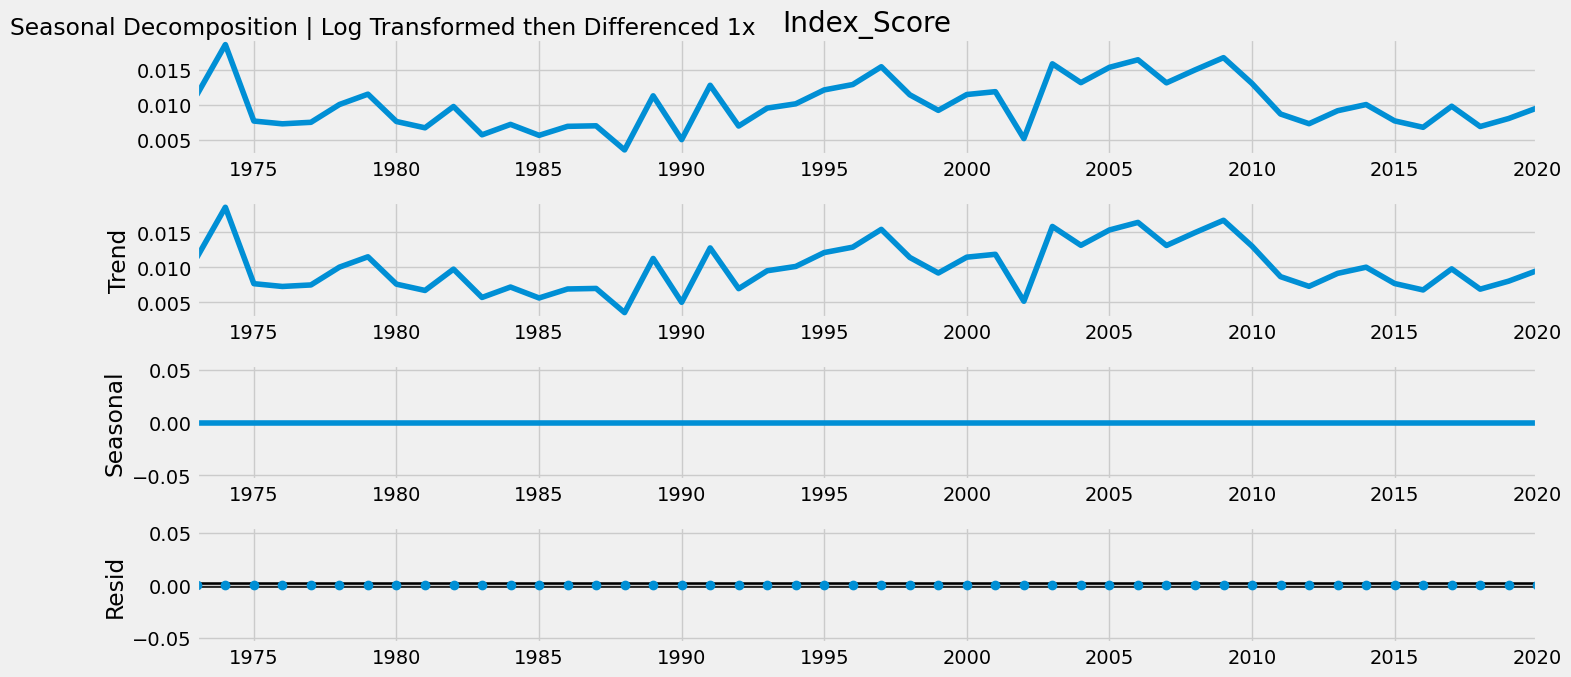

Seasonal Decomposition | Log Transformed then Differenced 1x

Index_Score | Augmented Dickey-Fuller Test Results:
                             Value
Test Statistic           -3.034686
p-value                   0.031780
Number of Lags            1.000000
Number of Observations   46.000000
Critical Values (1%)     -3.581258
Critical Values (5%)     -2.926785
Critical Values (10%)    -2.601541
IC Best                -323.210844 

p_value (0.03) is less than 0.05
Test Statistic (-3.03) is less than Critical threshold of 5% (-2.93). 
    
Null Hypothesis -rejected-, data is -stationary-



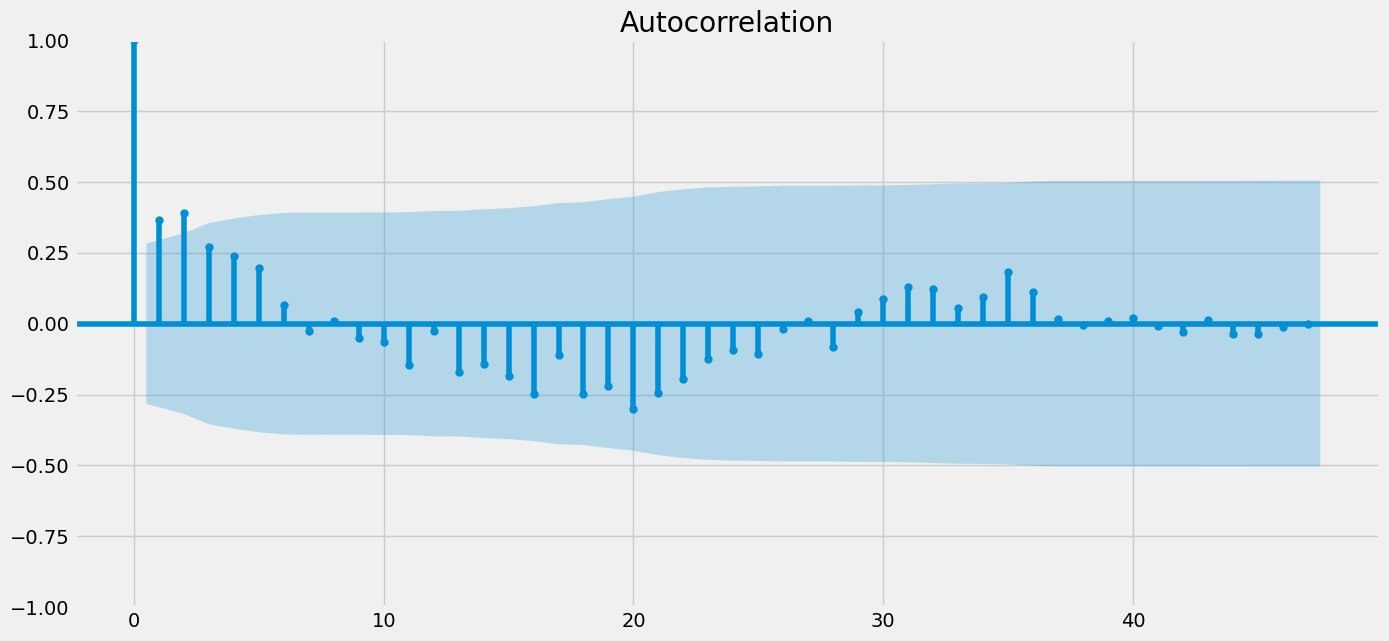

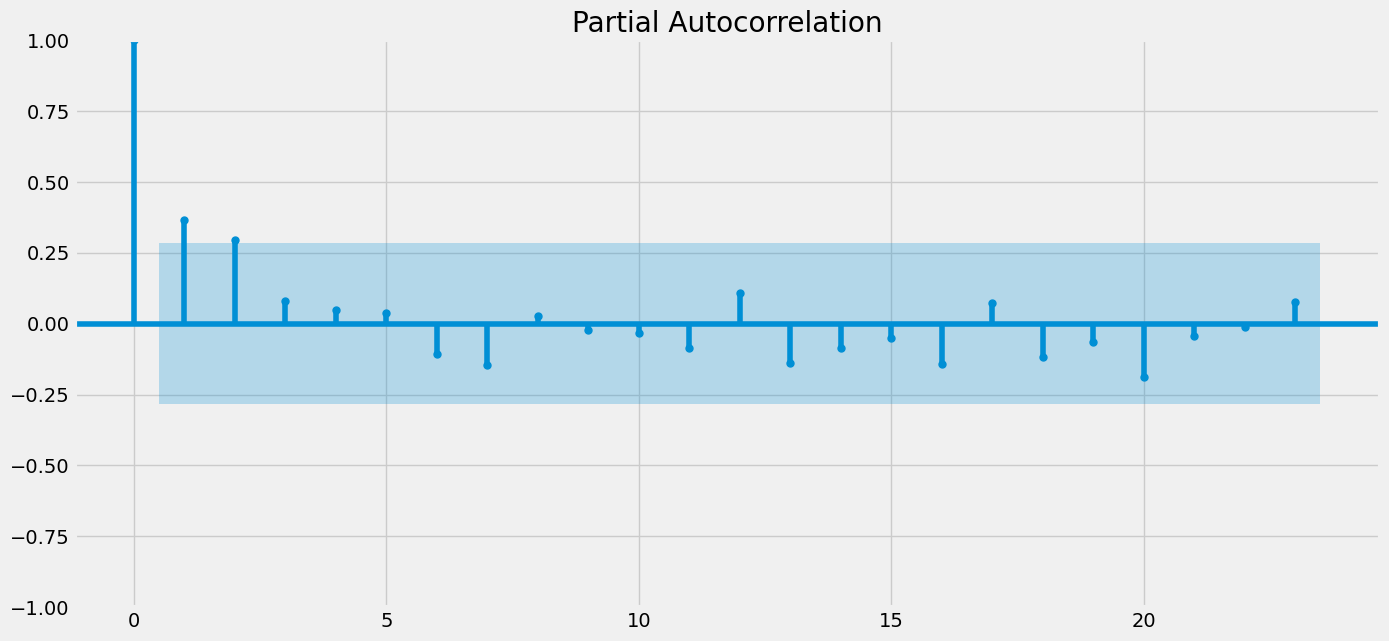


----------------------

Stationarity Analysis of Energy_Per_Cap


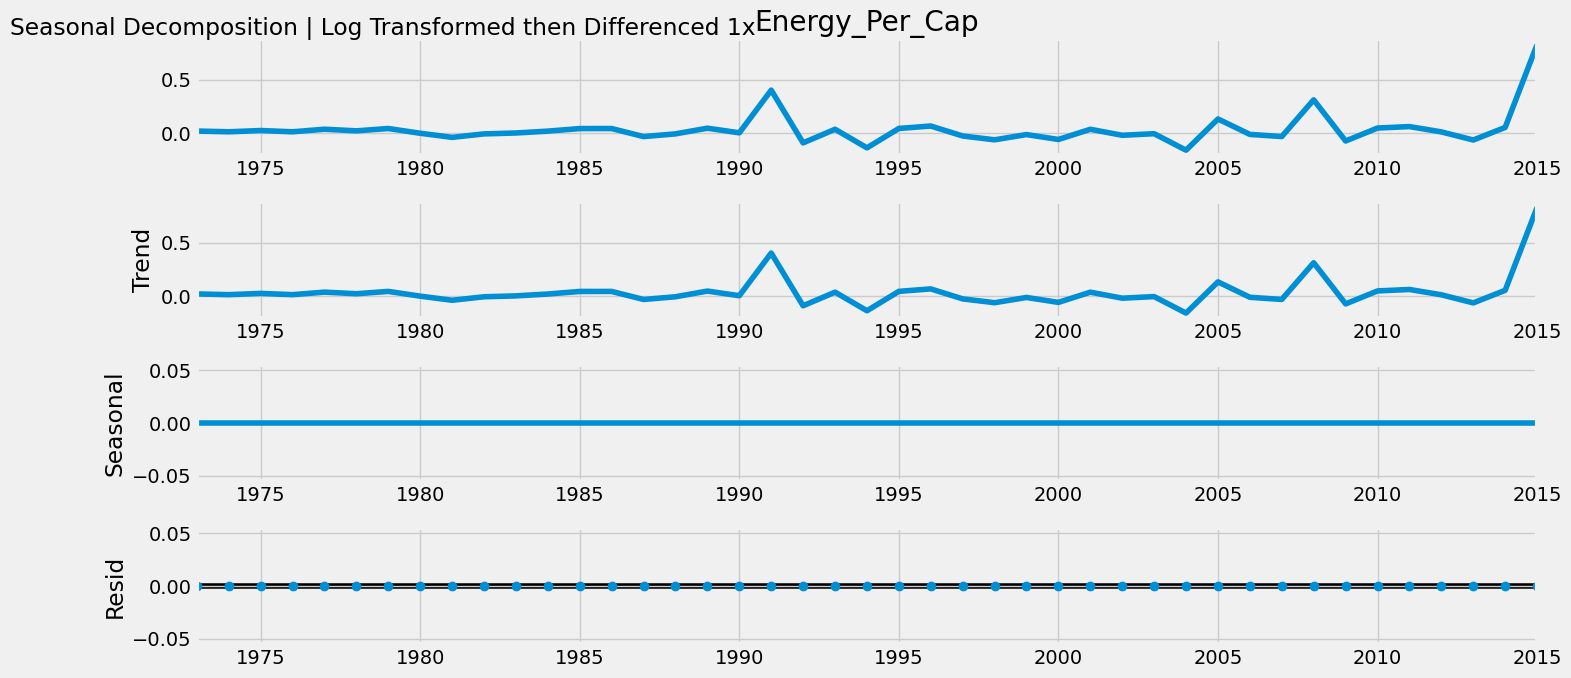

Seasonal Decomposition | Log Transformed then Differenced 1x

Energy_Per_Cap | Augmented Dickey-Fuller Test Results:
                            Value
Test Statistic          -4.706699
p-value                  0.000082
Number of Lags           0.000000
Number of Observations  42.000000
Critical Values (1%)    -3.596636
Critical Values (5%)    -2.933297
Critical Values (10%)   -2.604991
IC Best                -16.853754 

p_value (0.00) is less than 0.05
Test Statistic (-4.71) is less than Critical threshold of 5% (-2.93). 
    
Null Hypothesis -rejected-, data is -stationary-



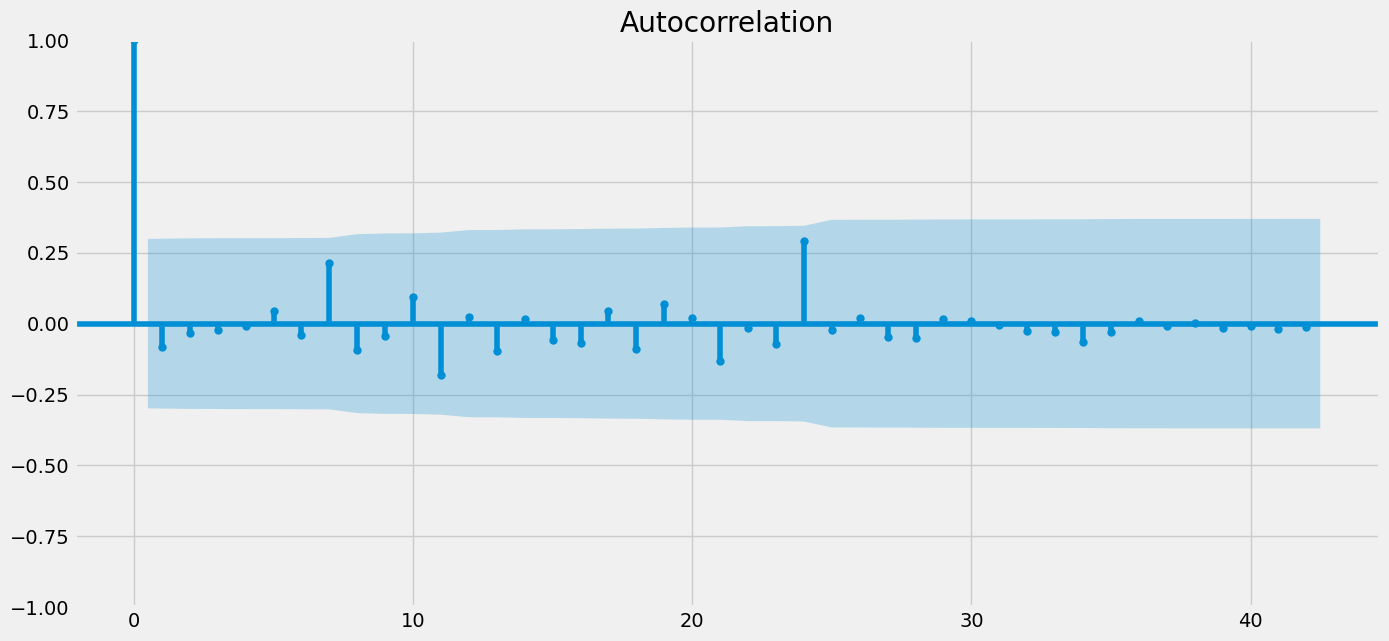

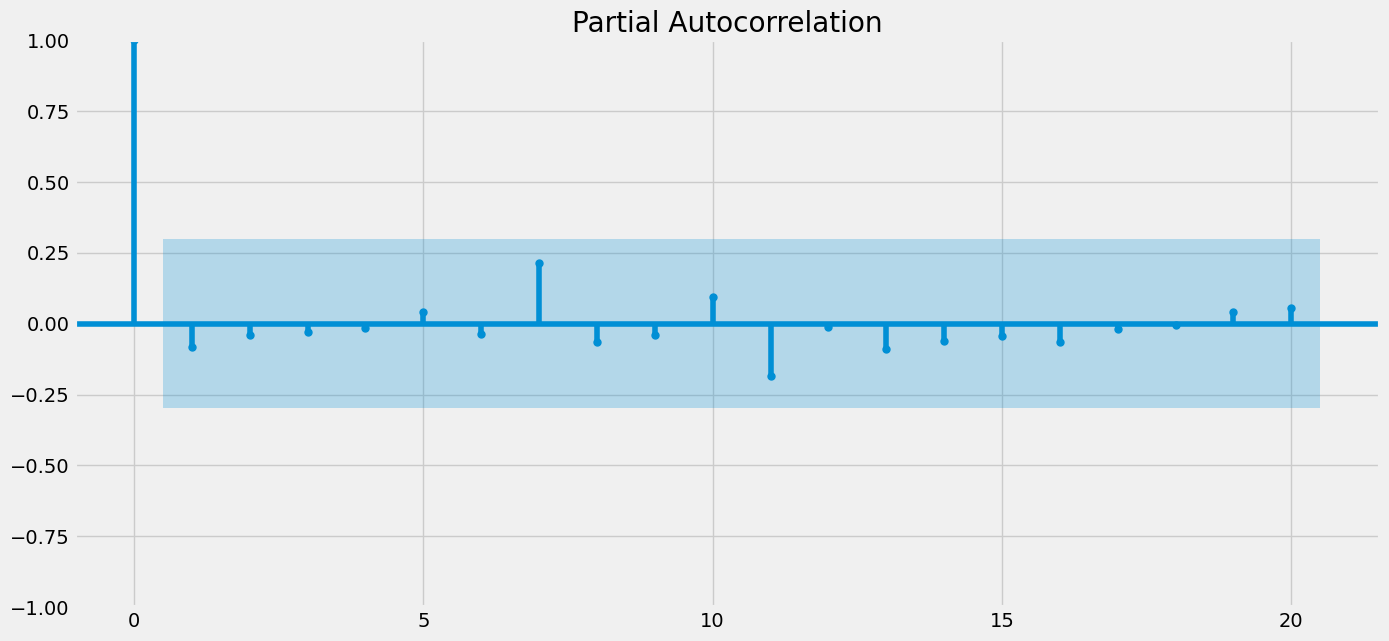


----------------------



In [20]:
stationarity(world, 'Index_Score', n=1, log=True, log_first=True)
stationarity(world, 'Energy_Per_Cap', n=1, log=True, log_first=True)


Stationarity Analysis of GDP_Per_Cap


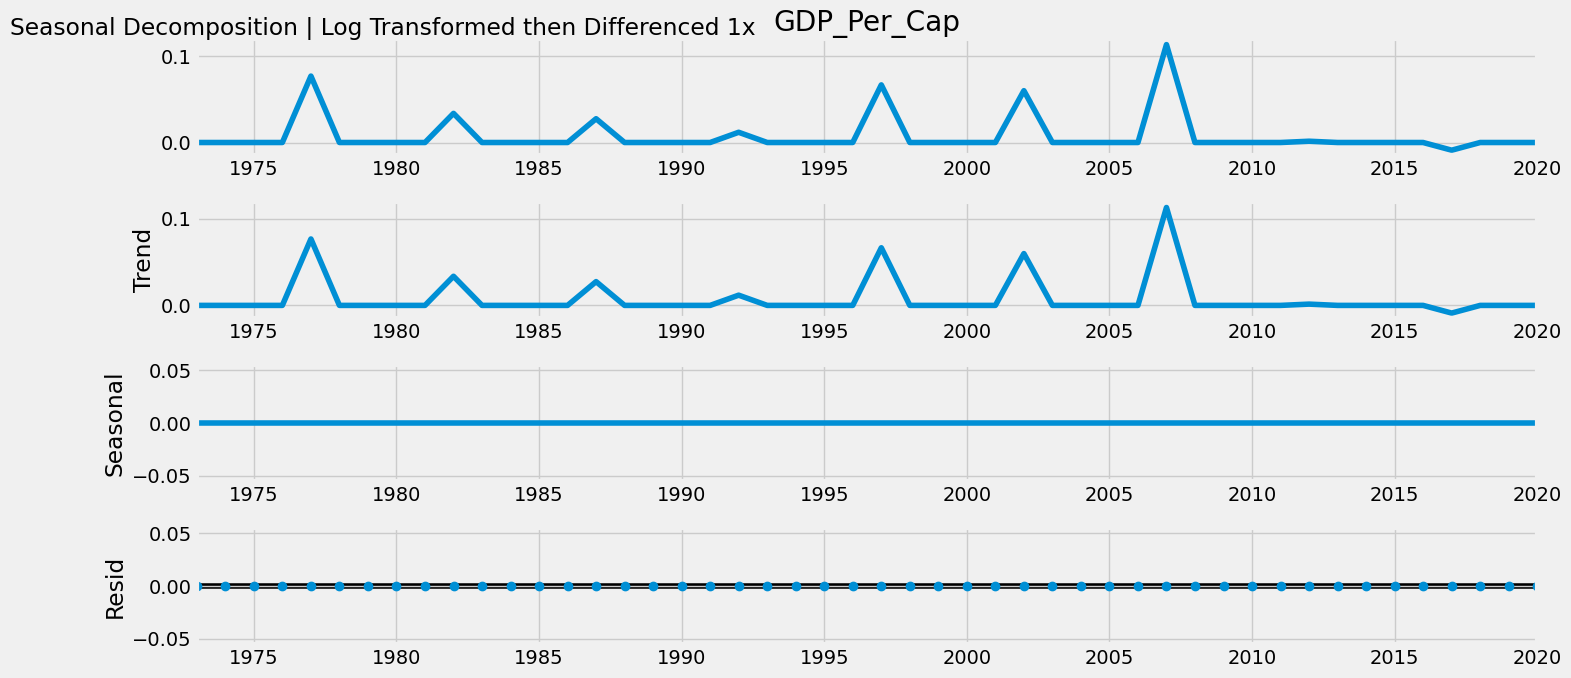

Seasonal Decomposition | Log Transformed then Differenced 1x

GDP_Per_Cap | Augmented Dickey-Fuller Test Results:
                             Value
Test Statistic           -2.034394
p-value                   0.271699
Number of Lags            4.000000
Number of Observations   43.000000
Critical Values (1%)     -3.592504
Critical Values (5%)     -2.931550
Critical Values (10%)    -2.604066
IC Best                -174.630951 

p_value (0.27) is greater than 0.05 and statistically not significant.




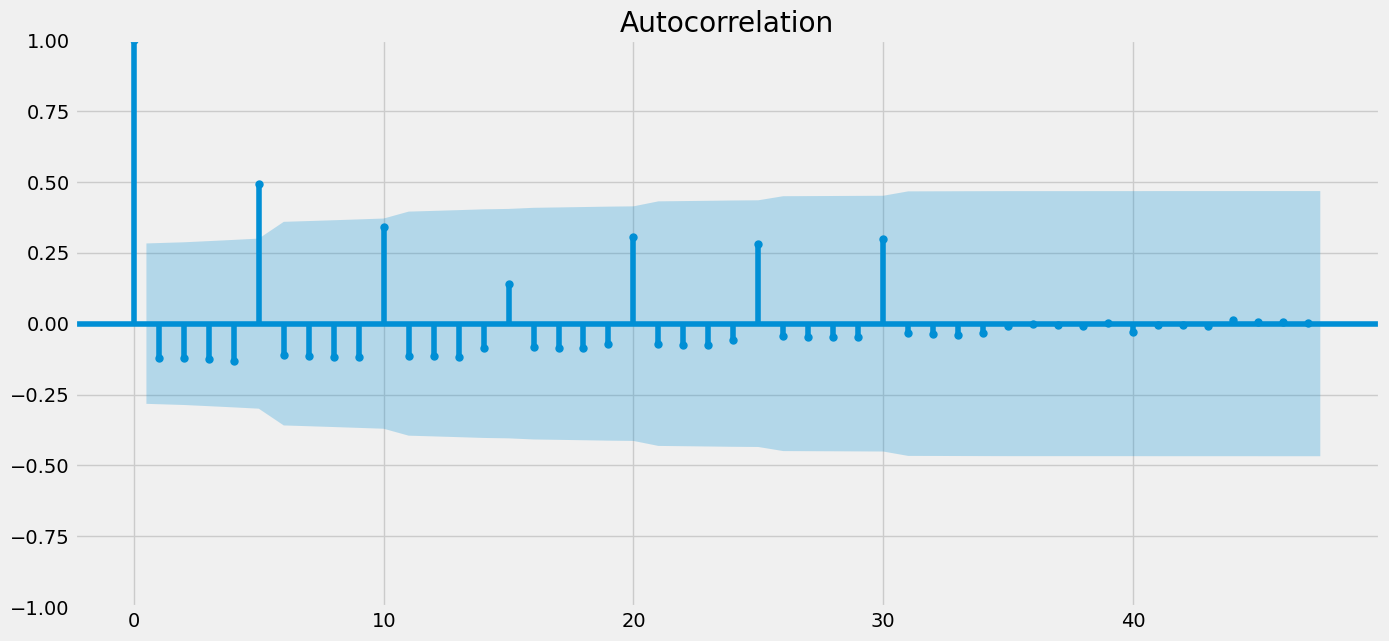

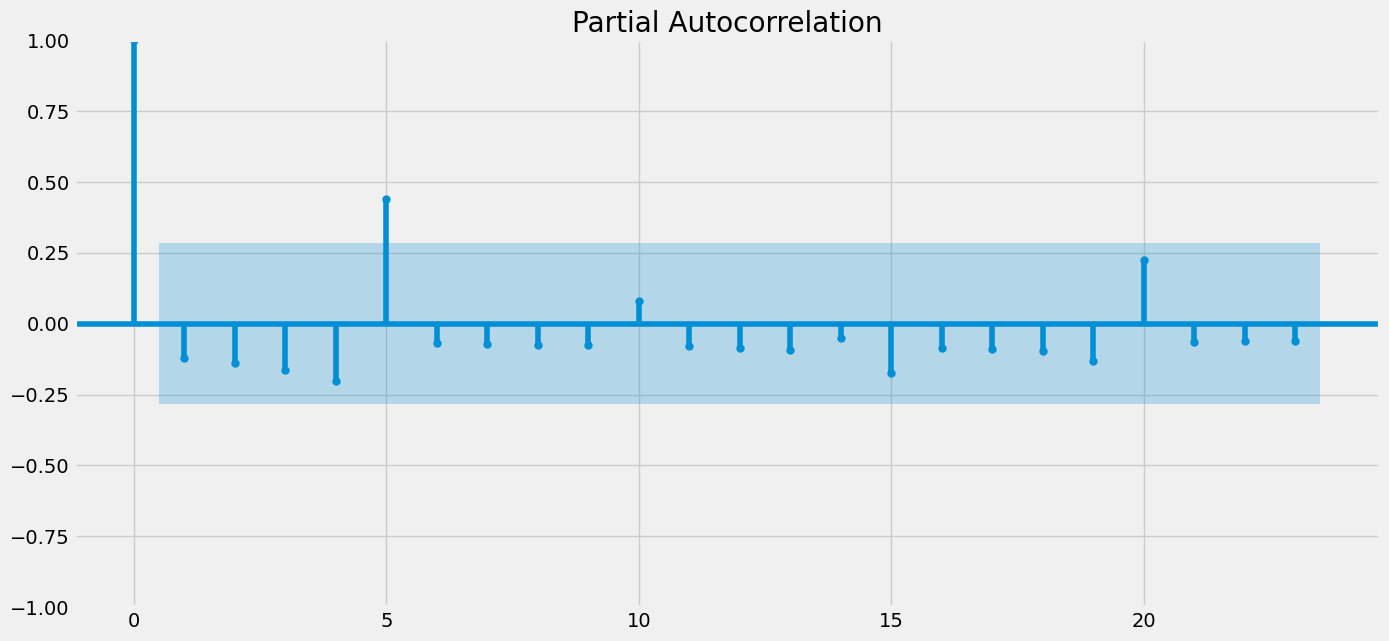


----------------------

Stationarity Analysis of Population


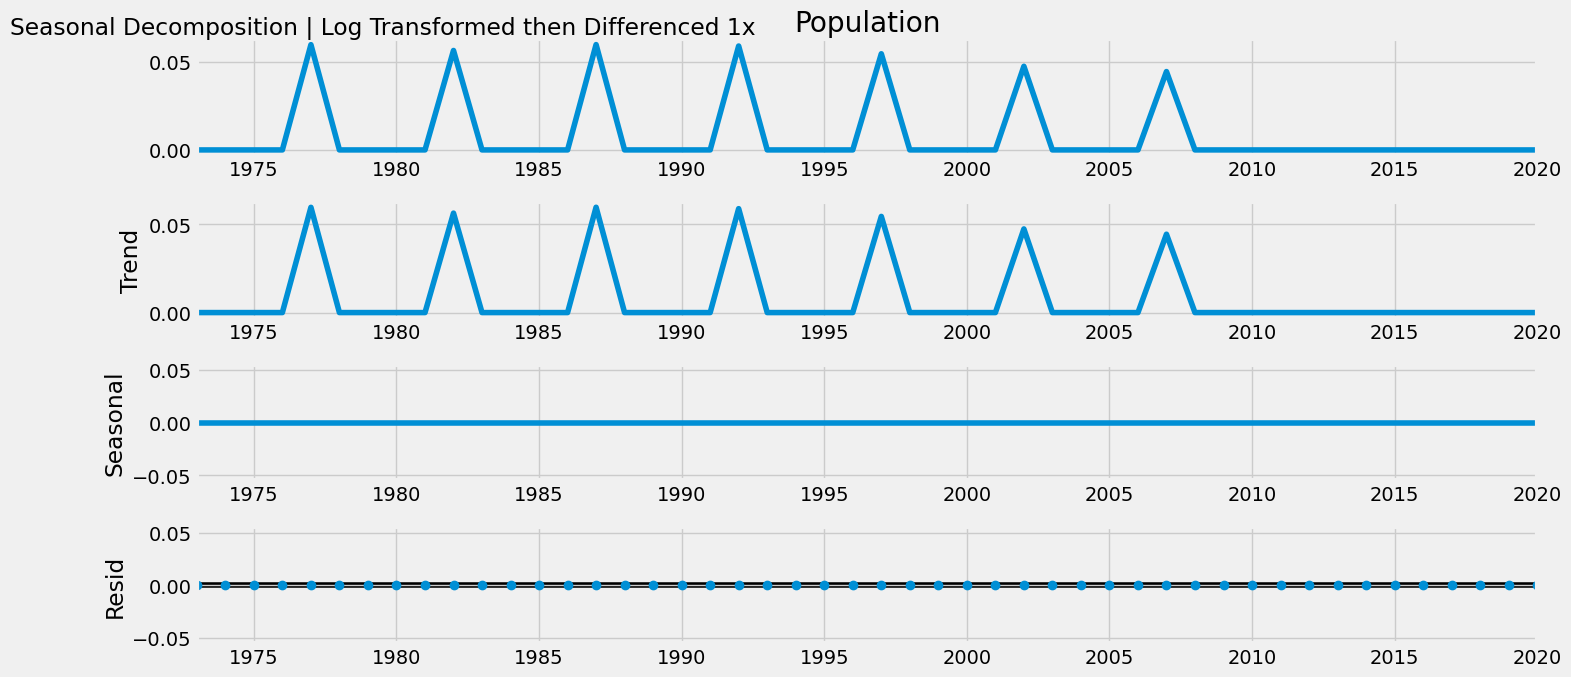

Seasonal Decomposition | Log Transformed then Differenced 1x

Population | Augmented Dickey-Fuller Test Results:
                             Value
Test Statistic           -0.180118
p-value                   0.940850
Number of Lags            4.000000
Number of Observations   43.000000
Critical Values (1%)     -3.592504
Critical Values (5%)     -2.931550
Critical Values (10%)    -2.604066
IC Best                -253.550307 

p_value (0.94) is greater than 0.05 and statistically not significant.




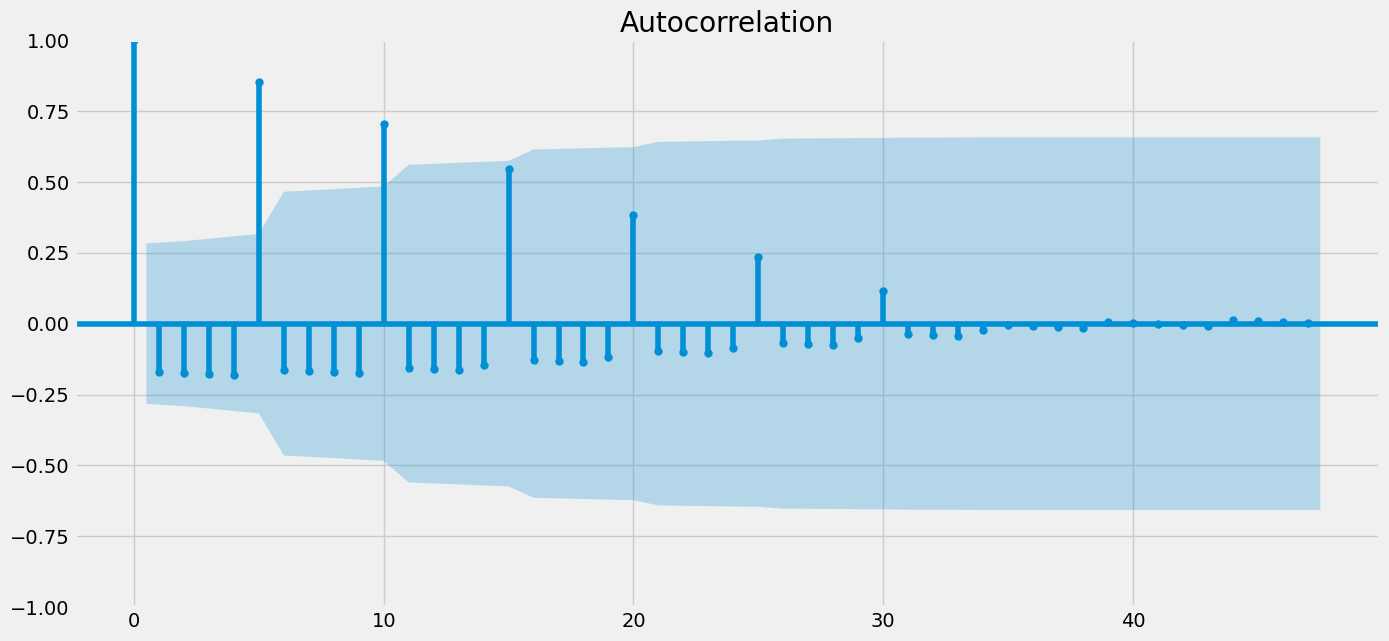

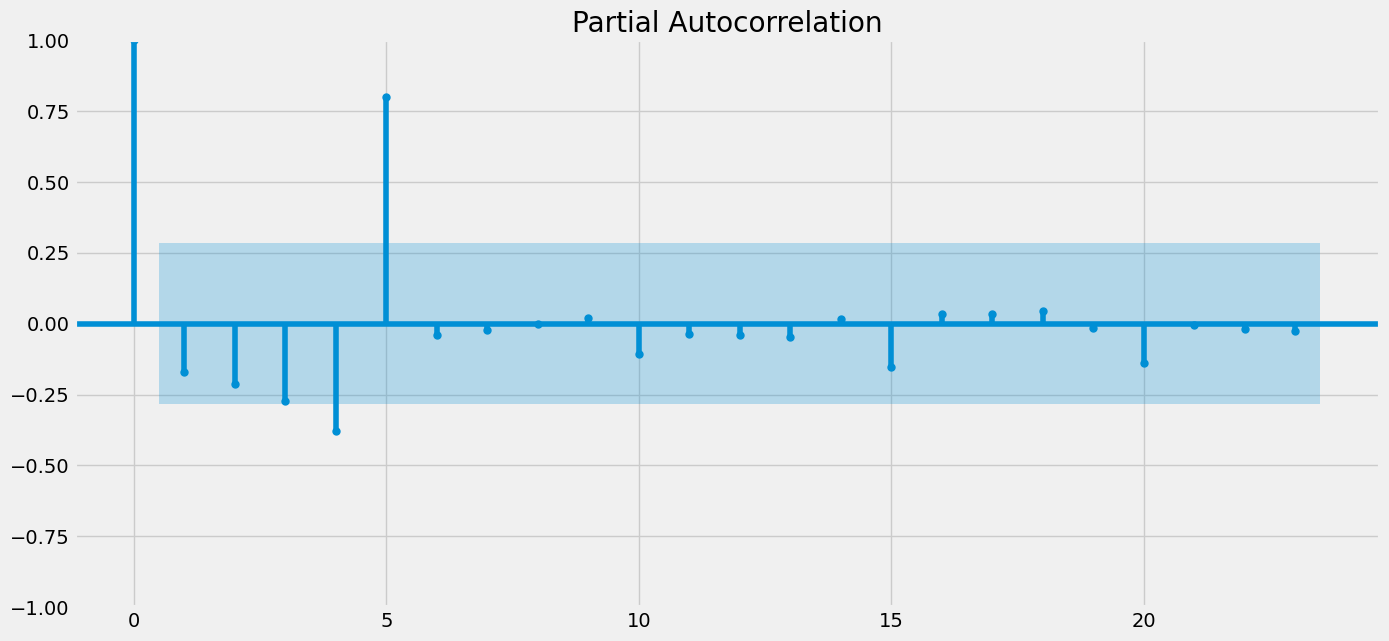


----------------------

Stationarity Analysis of Life_Exp


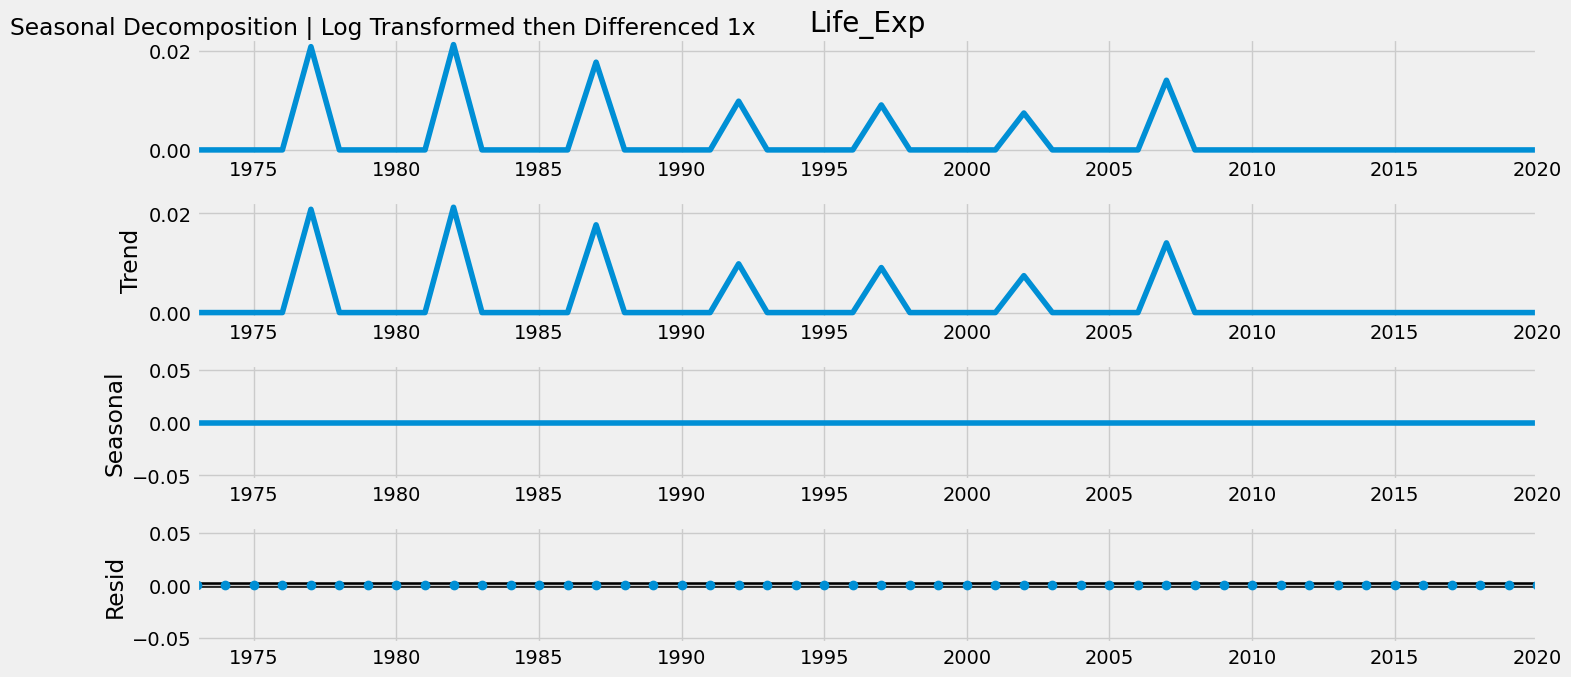

Seasonal Decomposition | Log Transformed then Differenced 1x

Life_Exp | Augmented Dickey-Fuller Test Results:
                             Value
Test Statistic           -1.110923
p-value                   0.710696
Number of Lags            4.000000
Number of Observations   43.000000
Critical Values (1%)     -3.592504
Critical Values (5%)     -2.931550
Critical Values (10%)    -2.604066
IC Best                -333.190100 

p_value (0.71) is greater than 0.05 and statistically not significant.




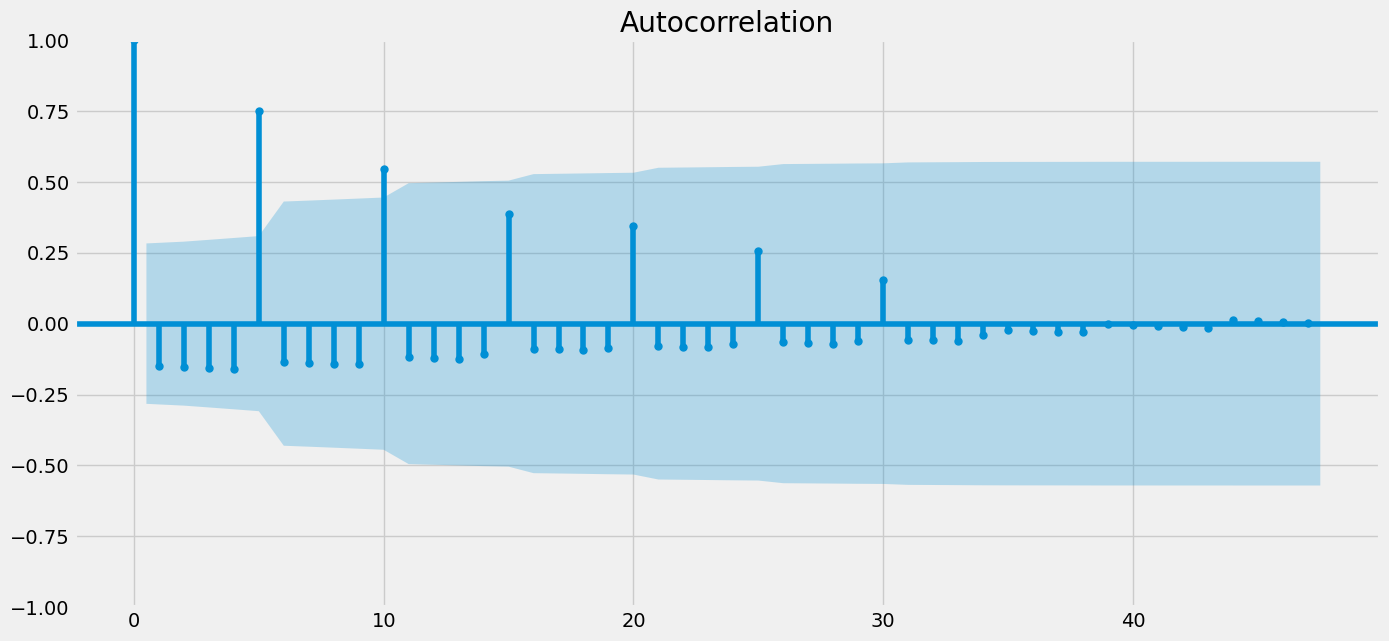

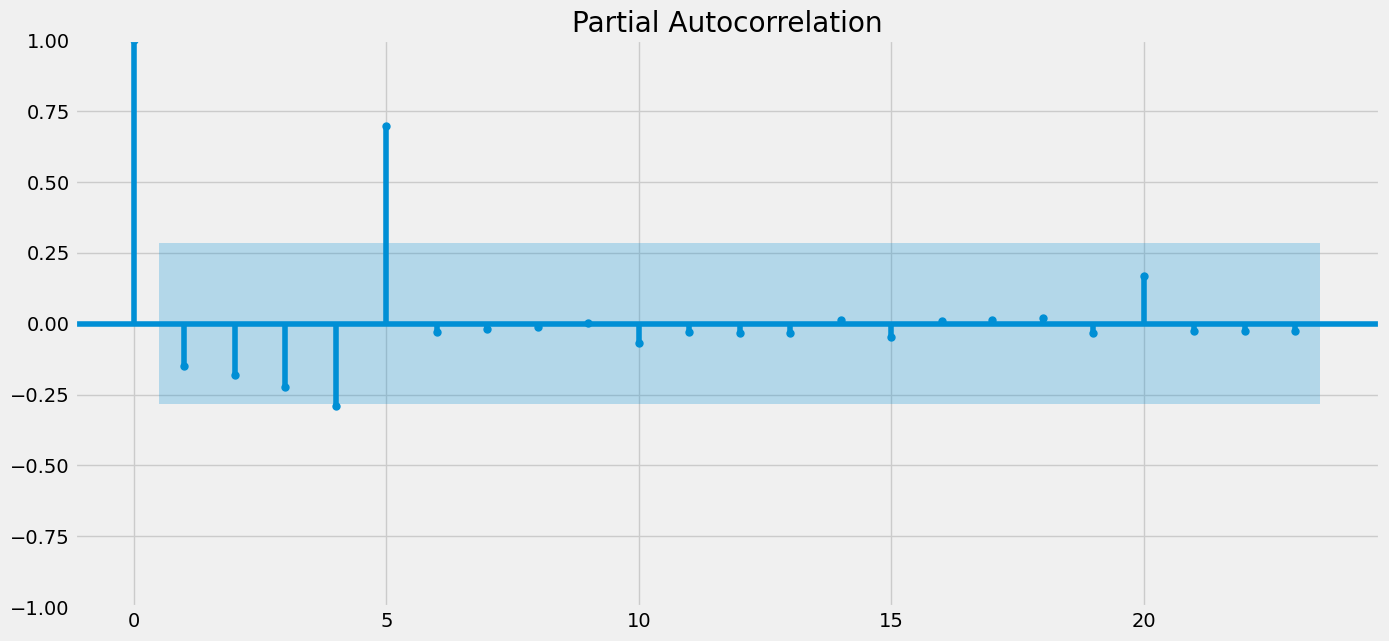


----------------------



In [21]:
multi_stationarity(world, ['GDP_Per_Cap', 'Population', 'Life_Exp'], n=1, log=True, log_first=True)

# _____________________________________________________ Forecasting

# ARIMA forecasting

In [22]:
%who

ARIMA	 adfuller	 arima_forecast	 autocorrelate	 country_	 country_mapping	 decomp	 df	 df1	 
df_full	 dickey_fuller	 difference	 energy	 energy_series	 eng	 gdp	 index	 life	 
match_countries	 matplotlib	 meta	 multi_stationarity	 np	 os	 path	 pd	 plt	 
pprint	 prepare_time_series	 px	 py	 quandl	 rcParams	 sm	 stationarity	 wei	 
world	 


                               SARIMAX Results                                
Dep. Variable:            Index_Score   No. Observations:                   36
Model:                 ARIMA(2, 1, 2)   Log Likelihood                  59.415
Date:                Sun, 10 Dec 2023   AIC                           -108.830
Time:                        14:15:42   BIC                           -101.054
Sample:                    01-01-1972   HQIC                          -106.146
                         - 01-01-2007                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5614      0.734      0.765      0.444      -0.876       1.999
ar.L2          0.4302      0.729      0.590      0.555      -0.998       1.859
ma.L1         -0.3216      0.784     -0.410      0.6

/Users/amritambe/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/amritambe/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



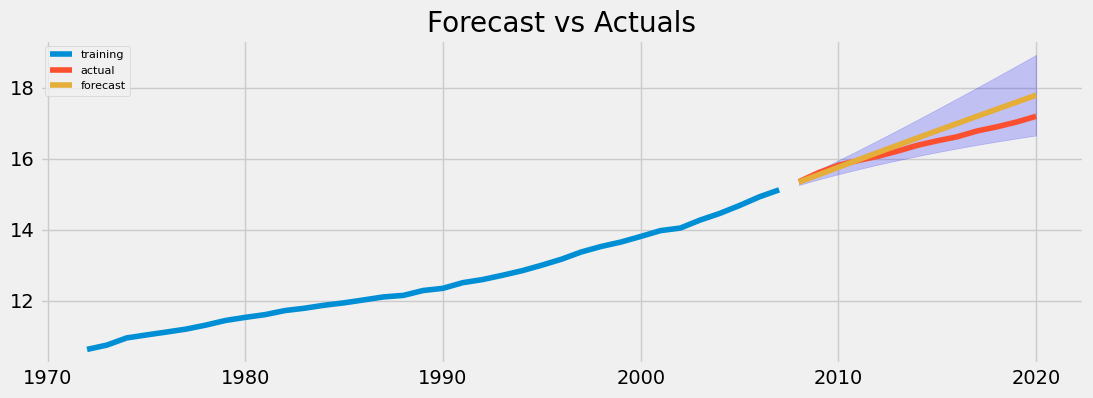

In [23]:
arima_forecast(world, 'Index_Score', p=2, d=1, q=2, split=0.75)

# USA stats

In [24]:
usa = country_.query('Country_Name == "United States of America"') \
              .set_index('Year') 
usa.head()

Country_Name  Index_Score  Life_Exp   Population  \
Year                                                                 
1972  United States of America    15.285714     71.34  209896000.0   
1973  United States of America    15.285714     71.34  209896000.0   
1974  United States of America    15.285714     71.34  209896000.0   
1975  United States of America    15.285714     71.34  209896000.0   
1976  United States of America    16.000000     71.34  209896000.0   

      GDP_Per_Cap  Energy_Per_Cap  
Year                               
1972     21806.04     7940.997832  
1973     21806.04     8163.603792  
1974     21806.04     7909.586480  
1975     21806.04     7656.263579  
1976     21806.04     8100.562222

Stationarity Analysis of Energy_Per_Cap


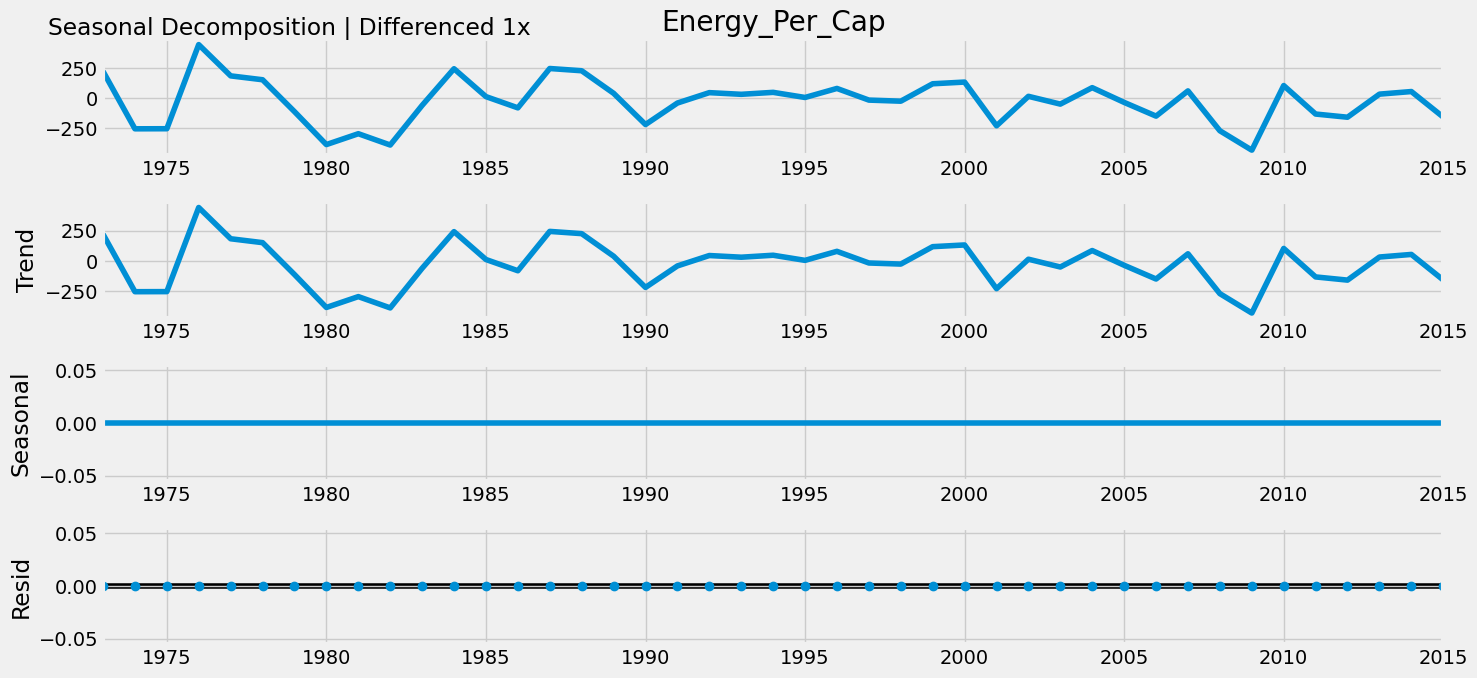

Seasonal Decomposition | Differenced 1x

Energy_Per_Cap | Augmented Dickey-Fuller Test Results:
                             Value
Test Statistic           -3.326159
p-value                   0.013749
Number of Lags            2.000000
Number of Observations   40.000000
Critical Values (1%)     -3.605565
Critical Values (5%)     -2.937069
Critical Values (10%)    -2.606986
IC Best                 413.614355 

p_value (0.01) is less than 0.05
Test Statistic (-3.33) is less than Critical threshold of 5% (-2.94). 
    
Null Hypothesis -rejected-, data is -stationary-



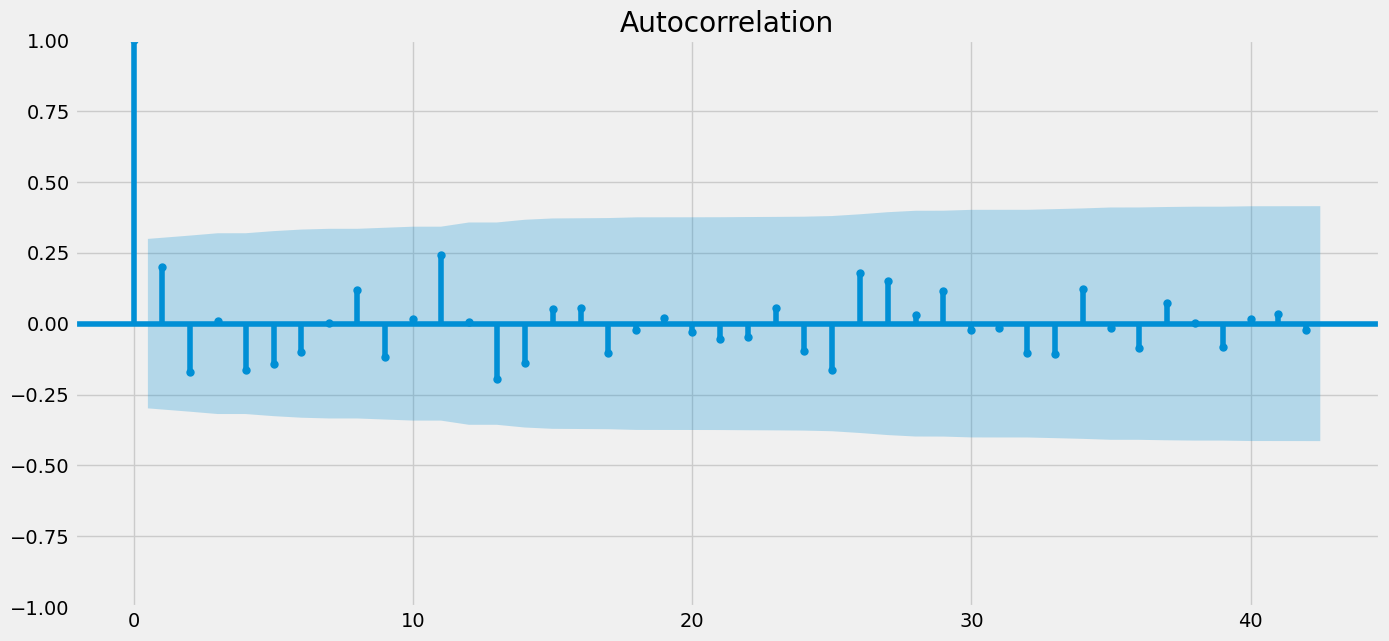

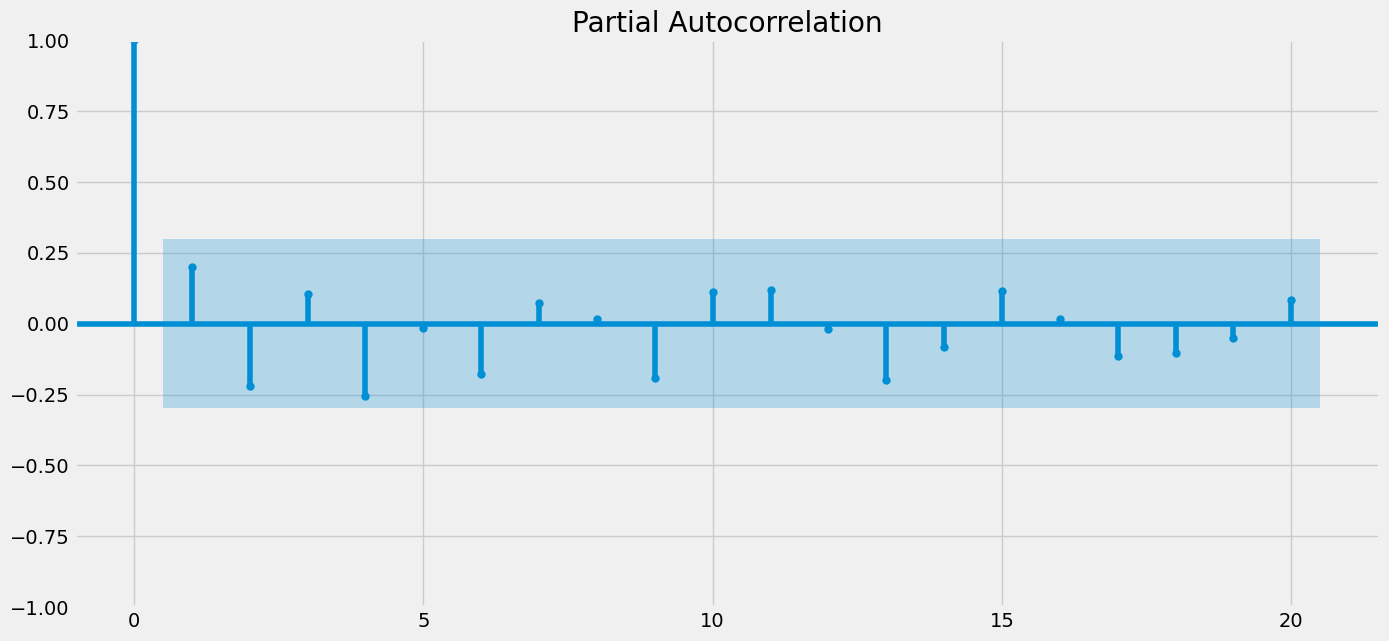


----------------------



In [25]:
stationarity(usa, 'Energy_Per_Cap', 1, log=None, log_first=True)

                               SARIMAX Results                                
Dep. Variable:         Energy_Per_Cap   No. Observations:                   29
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -182.821
Date:                Sun, 10 Dec 2023   AIC                            375.641
Time:                        14:24:21   BIC                            382.302
Sample:                    01-01-1972   HQIC                           377.678
                         - 01-01-2000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3680      0.311     -1.182      0.237      -0.978       0.242
ar.L2         -0.0200      0.183     -0.109      0.913      -0.379       0.339
ar.L3         -0.2409      0.247     -0.977      0.3

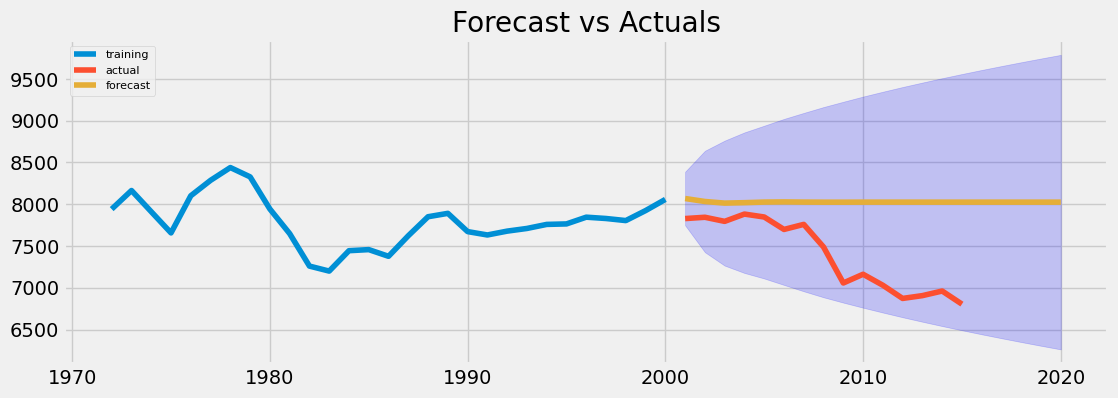

In [38]:
arima_forecast(usa, 'Energy_Per_Cap', 3, 1, 1, split=0.6)

This ARIMA forecast is focused on USA energy per capita. The predicted values' confidence intervals encompass the actual values, however it appears the model is forecasting static energy use, while the forecast is clearly trending down.

I need a little more clarification about exactly how best to use these tools and what to look for in order to adjust accordingly.